In [144]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pywt import wavedec

## Preprocessing

In [145]:
csv_uri = '../Preprocessing/db1/data_mfccRMScqtdb1L2.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-192.789871,106.347923,-79.240356,-52.291634,-20.981058,-11.934468,-13.260794,-17.717670,-23.114975,...,0.034879,0.059228,0.070871,0.102348,0.103710,0.093947,0.100797,0.114179,0.091331,MR
1,../data/DWT/MR/New_MR_174.wav,-162.750702,38.298462,-102.144073,-49.148815,-43.737663,-34.205257,-9.032406,-8.146068,-7.097356,...,0.069484,0.060226,0.065028,0.073905,0.072789,0.073293,0.072191,0.064000,0.050019,MR
2,../data/DWT/MR/New_MR_182.wav,-160.681747,36.747944,-102.481125,-45.316437,-46.576752,-34.581539,-11.903316,-8.515140,-9.945545,...,0.064995,0.069187,0.054361,0.093504,0.085147,0.083370,0.088292,0.063956,0.048358,MR
3,../data/DWT/MR/New_MR_005.wav,-203.247421,121.148338,-52.897278,-43.822632,-24.808895,-23.711615,-23.987087,-18.385975,-17.864765,...,0.083402,0.076128,0.070818,0.043667,0.040426,0.045460,0.050690,0.043011,0.039518,MR
4,../data/DWT/MR/New_MR_067.wav,-164.091202,39.444210,-103.663467,-42.972965,-47.984722,-30.348564,-12.164345,-3.734313,-7.506289,...,0.058249,0.062006,0.057848,0.063395,0.090946,0.074846,0.070364,0.056316,0.045957,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,../data/DWT/MVP/New_MVP_116.wav,-151.991074,20.373003,-66.260452,-36.576443,-27.120085,-8.107039,-5.371273,-3.824416,1.517548,...,0.028977,0.031534,0.049941,0.066262,0.072338,0.041065,0.032939,0.037722,0.048362,MVP
996,../data/DWT/MVP/New_MVP_190.wav,-135.630997,7.445810,-54.793270,-26.905485,-21.608339,-8.047515,-5.256081,1.495932,12.067432,...,0.084417,0.098111,0.088118,0.054058,0.034911,0.036500,0.055961,0.079532,0.098131,MVP
997,../data/DWT/MVP/New_MVP_164.wav,-269.061157,79.730919,-79.221397,-49.313976,-54.906921,-54.584332,-22.248714,12.976628,3.301058,...,0.064245,0.035888,0.019170,0.018052,0.012086,0.014483,0.014278,0.014144,0.007448,MVP
998,../data/DWT/MVP/New_MVP_169.wav,-261.190796,79.506386,-66.333588,-57.486443,-49.609840,-53.070591,-22.984493,8.204751,5.486668,...,0.068321,0.045444,0.026841,0.020998,0.021587,0.021471,0.016034,0.008673,0.009407,MVP


In [146]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [147]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-192.789871,106.347923,-79.240356,-52.291634,-20.981058,-11.934468,-13.260794,-17.717670,-23.114975,-12.420410,...,0.022507,0.034879,0.059228,0.070871,0.102348,0.103710,0.093947,0.100797,0.114179,0.091331
1,-162.750702,38.298462,-102.144073,-49.148815,-43.737663,-34.205257,-9.032406,-8.146068,-7.097356,-4.697388,...,0.081940,0.069484,0.060226,0.065028,0.073905,0.072789,0.073293,0.072191,0.064000,0.050019
2,-160.681747,36.747944,-102.481125,-45.316437,-46.576752,-34.581539,-11.903316,-8.515140,-9.945545,-3.856714,...,0.067097,0.064995,0.069187,0.054361,0.093504,0.085147,0.083370,0.088292,0.063956,0.048358
3,-203.247421,121.148338,-52.897278,-43.822632,-24.808895,-23.711615,-23.987087,-18.385975,-17.864765,-16.505753,...,0.060146,0.083402,0.076128,0.070818,0.043667,0.040426,0.045460,0.050690,0.043011,0.039518
4,-164.091202,39.444210,-103.663467,-42.972965,-47.984722,-30.348564,-12.164345,-3.734313,-7.506289,-4.037241,...,0.069482,0.058249,0.062006,0.057848,0.063395,0.090946,0.074846,0.070364,0.056316,0.045957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-151.991074,20.373003,-66.260452,-36.576443,-27.120085,-8.107039,-5.371273,-3.824416,1.517548,6.762758,...,0.045044,0.028977,0.031534,0.049941,0.066262,0.072338,0.041065,0.032939,0.037722,0.048362
996,-135.630997,7.445810,-54.793270,-26.905485,-21.608339,-8.047515,-5.256081,1.495932,12.067432,12.077813,...,0.064554,0.084417,0.098111,0.088118,0.054058,0.034911,0.036500,0.055961,0.079532,0.098131
997,-269.061157,79.730919,-79.221397,-49.313976,-54.906921,-54.584332,-22.248714,12.976628,3.301058,6.410655,...,0.086413,0.064245,0.035888,0.019170,0.018052,0.012086,0.014483,0.014278,0.014144,0.007448
998,-261.190796,79.506386,-66.333588,-57.486443,-49.609840,-53.070591,-22.984493,8.204751,5.486668,5.965727,...,0.089395,0.068321,0.045444,0.026841,0.020998,0.021587,0.021471,0.016034,0.008673,0.009407


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(200,)
(800, 101, 1)
(200, 101, 1)


In [150]:
X_train.shape[2], y.shape

(1, (1000,))

In [151]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [152]:
# LSTM tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
25/25 [==============================] - 22s 607ms/step - loss: 1.6086 - acc: 0.2000 - val_loss: 1.6063 - val_acc: 0.2400
Epoch 2/50
25/25 [==============================] - 15s 570ms/step - loss: 1.6066 - acc: 0.2237 - val_loss: 1.6034 - val_acc: 0.3250
Epoch 3/50
25/25 [==============================] - 14s 551ms/step - loss: 1.6035 - acc: 0.2138 - val_loss: 1.5970 - val_acc: 0.3300
Epoch 4/50
25/25 [==============================] - 14s 566ms/step - loss: 1.5980 - acc: 0.2637 - val_loss: 1.5867 - val_acc: 0.2450
Epoch 5/50
25/25 [==============================] - 15s 598ms/step - loss: 1.5863 - acc: 0.2212 - val_loss: 1.5625 - val_acc: 0.2600
Epoch 6/50
25/25 [==============================] - 14s 550ms/step - loss: 1.5655 - acc: 0.2212 - val_loss: 1.5400 - val_acc: 0.2800
Epoch 7/50
25/25 [==============================] - 11s 438ms/step - loss: 1.5463 - acc: 0.2713 - val_loss: 1.5146 - val_acc: 0.3300
Epoch 8/50
25/25 [==============================] - 13s 520ms/step - 

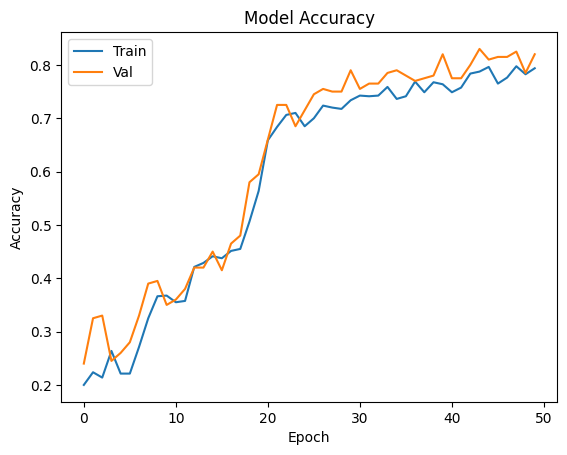

In [153]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [154]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

7/7 [==============================] - 1s 184ms/step - loss: 0.4959 - acc: 0.8200
Accuracy on test set is: 0.8199999928474426


In [155]:
X_test

array([[[-2.21957214e+02],
        [ 6.43203659e+01],
        [-3.36667061e+01],
        ...,
        [ 2.06694584e-02],
        [ 2.73178071e-02],
        [ 1.98466424e-02]],

       [[-2.64819672e+02],
        [ 9.92174225e+01],
        [-1.90675755e+01],
        ...,
        [ 6.55861385e-03],
        [ 5.78241982e-03],
        [ 4.23909677e-03]],

       [[-2.50824814e+02],
        [ 1.11339752e+02],
        [-4.19954567e+01],
        ...,
        [ 2.24783979e-02],
        [ 2.60804966e-02],
        [ 2.40300763e-02]],

       ...,

       [[-2.94877228e+02],
        [ 1.14723900e+02],
        [-5.30562248e+01],
        ...,
        [ 1.16892410e-02],
        [ 1.31638171e-02],
        [ 1.17110657e-02]],

       [[-1.98906982e+02],
        [ 5.37993622e+01],
        [-4.67397041e+01],
        ...,
        [ 1.78502537e-02],
        [ 2.16722582e-02],
        [ 1.66382249e-02]],

       [[-1.80338684e+02],
        [ 4.15438766e+01],
        [-1.06839188e+02],
        ...,
        

In [156]:
model.predict(X_test)

7/7 [==============================] - 3s 216ms/step


array([[1.49091661e-01, 3.33372265e-01, 3.60450238e-01, 7.74642348e-01,
        9.60370243e-01],
       [7.92877555e-01, 5.80866575e-01, 6.52163982e-01, 2.72600740e-01,
        8.00292566e-03],
       [3.13658088e-01, 7.92233288e-01, 9.30663288e-01, 4.39383537e-01,
        4.20739353e-02],
       [4.22474474e-01, 7.45627046e-01, 9.00085270e-01, 4.73416120e-01,
        2.22497117e-02],
       [8.87248293e-02, 3.19181383e-01, 2.36521438e-01, 9.38964665e-01,
        9.78617132e-01],
       [3.97715867e-01, 7.64955938e-01, 9.09369946e-01, 4.26747054e-01,
        3.01069431e-02],
       [4.66247529e-01, 7.05136597e-01, 8.48528922e-01, 3.84021759e-01,
        5.47826514e-02],
       [8.47338885e-02, 4.19479012e-01, 2.23304719e-01, 9.02406096e-01,
        9.90858078e-01],
       [8.29243183e-01, 5.18916905e-01, 6.13572419e-01, 3.50071639e-01,
        5.65176131e-03],
       [8.39609444e-01, 9.94219124e-01, 4.24917281e-01, 7.61358976e-01,
        2.28297804e-03],
       [1.39636382e-01, 6.7229

In [157]:

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 2s 208ms/step


array([[44,  0,  3,  0,  1],
       [ 2, 21,  9,  0,  1],
       [ 4,  1, 33,  0,  0],
       [ 4,  2,  3, 30,  5],
       [ 0,  0,  0,  1, 36]])

In [158]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.88      0.64      0.74        33
           2       0.69      0.87      0.77        38
           3       0.97      0.68      0.80        44
           4       0.84      0.97      0.90        37

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.81       200
weighted avg       0.84      0.82      0.82       200



In [159]:
# save h5
model_uri = '../modelh5/model_LSTM.h5'
model.save(model_uri)

In [160]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 101, 128)          66560     
                                                                 
 lstm_32 (LSTM)              (None, 64)                49408     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 5)                 85        
                                                                 
Total params: 118,661
Trainable params: 118,661
Non-trainable params: 0
_________________________________________________________________


In [161]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_114.wav')

1/1 [==============================] - 1s 1s/step
[0.10839238 0.4942758  0.2659627  0.89452815 0.9719734 ]
4
Predicted class: N


In [162]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-461.970276,76.466766,8.232585,5.376008,3.355752,-14.712471,-14.28373,-11.86776,-7.578109,...,0.000997,0.001009,0.001038,0.001139,0.000566,0.000932,0.000775,0.000444,0.000473,NaN
